# Movie Ratings Analysis: Letterboxd Dataset

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import gdown
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Get the dataset
file_id = "1XBC_ppV4Rl1-TzeVie-gWzUZAlk8dct_"
url = f"https://drive.google.com/uc?id={file_id}"
output = "letterboxd_movies.csv"

gdown.download(url, output, quiet=False)

# Load the dataset
df = pd.read_csv(output)
df.head()

Downloading...
From: https://drive.google.com/uc?id=1XBC_ppV4Rl1-TzeVie-gWzUZAlk8dct_
To: /content/letterboxd_movies.csv
100%|██████████| 4.53M/4.53M [00:00<00:00, 30.2MB/s]


,Unnamed: 0,Film_title,Director,Average_rating,Genres,Runtime,Original_language,Description,Studios,Watches,List_appearances,Likes,Fans,Lowest★,Medium★★★,Highest★★★★★,Total_ratings
0,0,The Fan,Eckhart Schmidt,3.57,"['Horror', 'Drama']",92.0,German,The hero-worship that Simone has for a pop sin...,['Barbara Moorse Workshop'],12841,11032,3763,79,129,1660,714,9042
1,1,Mad Max: Fury Road,George Miller,4.18,"['Adventure', 'Science Fiction', 'Action']",121.0,English,An apocalyptic story set in the furthest reach...,"['Warner Bros. Pictures', 'Village Roadshow Pi...",2488721,331681,927538,38000,12530,158356,511140,1682389
2,2,Suspiria,Dario Argento,3.93,['Horror'],99.0,English,An American newcomer to a prestigious German b...,['Seda Spettacoli'],618171,220094,219548,13000,2814,53427,88628,443757
3,3,Lost in Translation,Sofia Coppola,3.79,"['Drama', 'Comedy', 'Romance']",102.0,English,"Two lost souls visiting Tokyo -- the young, ne...","['American Zoetrope', 'Elemental Films']",1596190,254180,493248,38000,15167,155110,193717,1076949
4,4,Akira,Katsuhiro Otomo,4.28,"['Animation', 'Action', 'Science Fiction']",124.0,Japanese,A secret military project endangers Neo-Tokyo ...,"['MBS', 'Sumitomo Corporation', 'TOHO', 'Studi...",873068,175586,341567,21000,1822,40850,196532,600721


## Data Cleaning
- Check for missing values
- Convert columns to appropriate types
- Parse genres from string to list

In [4]:
# Data cleaning functions
def parse_genres(genre_str):
    try:
        return eval(genre_str)
    except:
        return []

def clean_dataframe(df):
    df = df.copy()
    df['Genres'] = df['Genres'].apply(parse_genres)
    df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')
    df['Average_rating'] = pd.to_numeric(df['Average_rating'], errors='coerce')
    return df

df = clean_dataframe(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         10000 non-null  int64  
 1   Film_title         10000 non-null  object 
 2   Director           10000 non-null  object 
 3   Average_rating     10000 non-null  float64
 4   Genres             10000 non-null  object 
 5   Runtime            10000 non-null  float64
 6   Original_language  10000 non-null  object 
 7   Description        10000 non-null  object 
 8   Studios            10000 non-null  object 
 9   Watches            10000 non-null  int64  
 10  List_appearances   10000 non-null  int64  
 11  Likes              10000 non-null  int64  
 12  Fans               10000 non-null  int64  
 13  Lowest★            10000 non-null  int64  
 14  Medium★★★          10000 non-null  int64  
 15  Highest★★★★★       10000 non-null  int64  
 16  Total_ratings      1000

## Grouping and Aggregation
- By genre: count, average rating
- By year: count, average rating
- By rating: distribution

In [5]:
# Group by genre: count and average rating
def genre_stats(df):
    genre_list = []
    for _, row in df.iterrows():
        for genre in row['Genres']:
            genre_list.append({'Genre': genre, 'Average_rating': row['Average_rating']})
    genre_df = pd.DataFrame(genre_list)
    return genre_df.groupby('Genre').agg({'Average_rating': ['count', 'mean']}).sort_values(('Average_rating', 'count'), ascending=False)

genre_stats(df)

Average_rating          
                                                            count      mean
Genre                                                                      
Drama                                                        4416  3.446091
Comedy                                                       2932  3.203666
Thriller                                                     2312  3.168138
Action                                                       2074  3.071804
Horror                                                       1812  3.006771
Crime                                                        1523  3.332746
Adventure                                                    1448  3.119448
Romance                                                      1373  3.329807
Science Fiction                                              1265  3.041838
Fantasy                                                       995  3.143920
Mystery                                                       835  3.262405
Family                                                        718  3.180511
Animation                                                     689  3.404480
History                                                       451  3.526803
Documentary                                                   430  3.639140
War                                                           361  3.504378
Music                                                         350  3.459239
Western                                                       282  3.376342
TV Movie                                                      210  3.184741
Show All…                                                       2  2.950000
Epic heroes                                                     2  2.950000
Captivating vision and Shakespearean drama                      1  2.860000
Epic adventure and breathtaking battles                         1  3.040000
Epic history and literature                                     1  2.860000
Historical battles and epic heroism                             1  2.860000
Fantasy adventure, heroism, and swordplay                       1  2.860000
Superheroes in action-packed battles with villains              1  3.040000

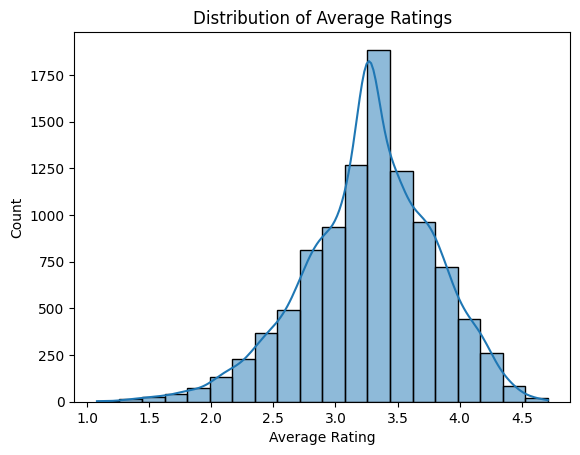

In [6]:
# Rating distribution
sns.histplot(df['Average_rating'].dropna(), bins=20, kde=True)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.show()

## Visualization by Genre

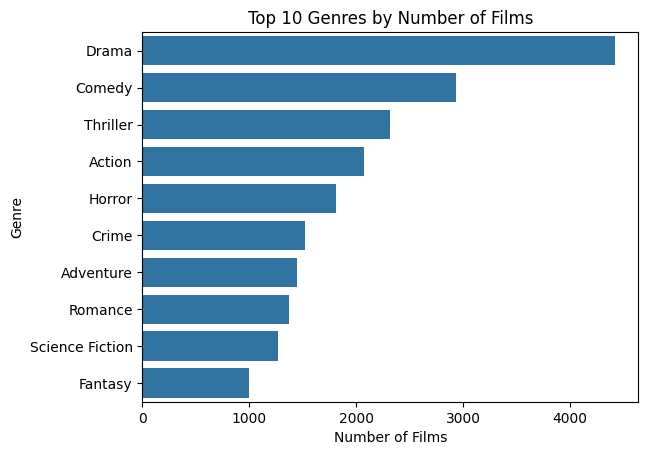

In [7]:
# Top genres by number of films
genre_df = genre_stats(df).reset_index()
sns.barplot(data=genre_df.head(10), x=('Average_rating', 'count'), y='Genre')
plt.title('Top 10 Genres by Number of Films')
plt.xlabel('Number of Films')
plt.ylabel('Genre')
plt.show()

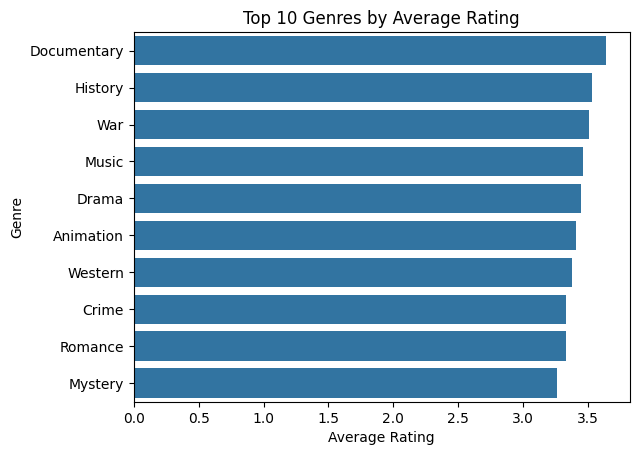

In [8]:
# Average rating by genre
sns.barplot(data=genre_df.sort_values(('Average_rating', 'mean'), ascending=False).head(10), x=('Average_rating', 'mean'), y='Genre')
plt.title('Top 10 Genres by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

## Further Analysis
- Grouping by director, language, or studio
- Correlation between runtime and rating

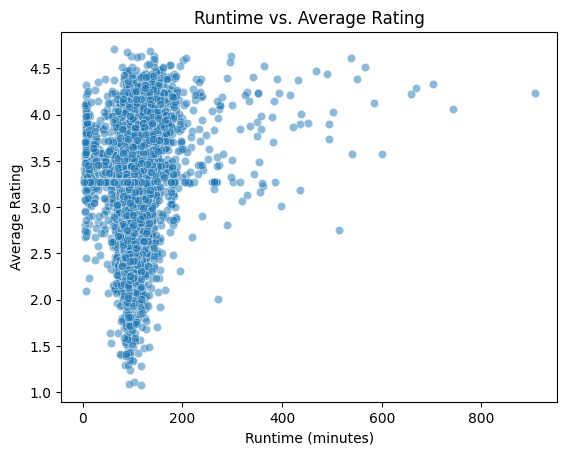

In [9]:
# Correlation between runtime and average rating
sns.scatterplot(data=df, x='Runtime', y='Average_rating', alpha=0.5)
plt.title('Runtime vs. Average Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average Rating')
plt.show()

## Export to Google Sheets
Export analysis results to Google Sheets using gspread.

In [11]:
import gspread
from gspread_dataframe import set_with_dataframe
from google.colab import auth
auth.authenticate_user()

from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

# Create a table or connect the existing one
spreadsheet = gc.create('Letterboxd_Analysis')
worksheet = spreadsheet.get_worksheet(0)

# push data
set_with_dataframe(worksheet, df)

spreadsheet.url

'https://docs.google.com/spreadsheets/d/15JJ_qgWbiDlvuVpjAeqDKzfMMjIdYd51USqHSZ8OLU0'